In [55]:
from sklearn.datasets import load_linnerud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [56]:
linnerud = load_linnerud()
print("Описание датасета Linnerud:")
print(linnerud.DESCR)

print("Имена признаков:")
print(linnerud.feature_names)

print("Имена целевых переменных:")
print(linnerud.target_names)

print("Первые несколько записей данных:")
print(linnerud.data[:5])

Описание датасета Linnerud:
.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|
Имена признаков:
['Chins', 'Situps', 'Jumps']
Имена целевых переменных:
['Weight', 'Waist', 'Pulse']
Первые несколько записей данных:
[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]


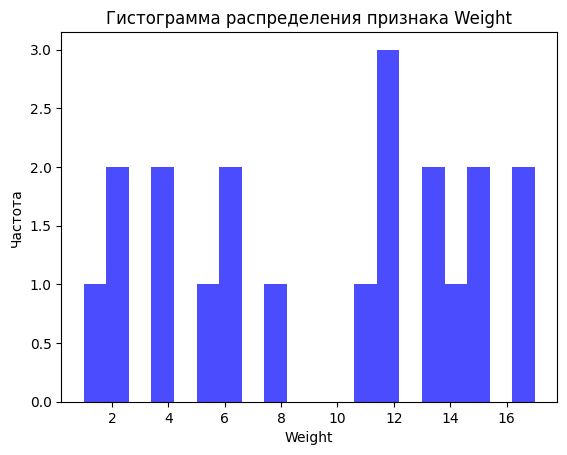

In [57]:
plt.hist(linnerud.data[:, 0], bins=20, color='b', alpha=0.7)
plt.xlabel("Weight")
plt.ylabel("Частота")
plt.title("Гистограмма распределения признака Weight")
plt.show()

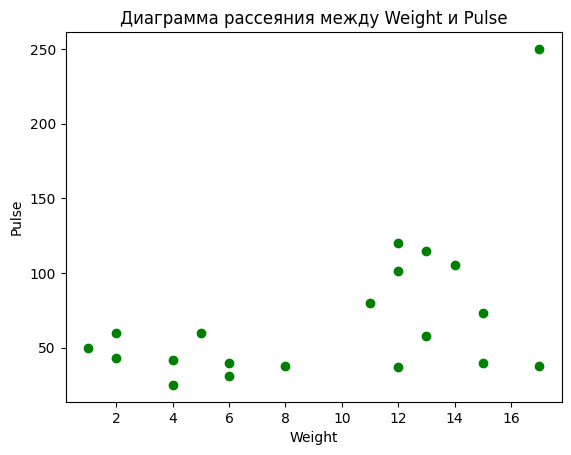

In [58]:
plt.scatter(linnerud.data[:, 0], linnerud.data[:, 2], color='g', marker='o')
plt.xlabel("Weight")
plt.ylabel("Pulse")
plt.title("Диаграмма рассеяния между Weight и Pulse")
plt.show()

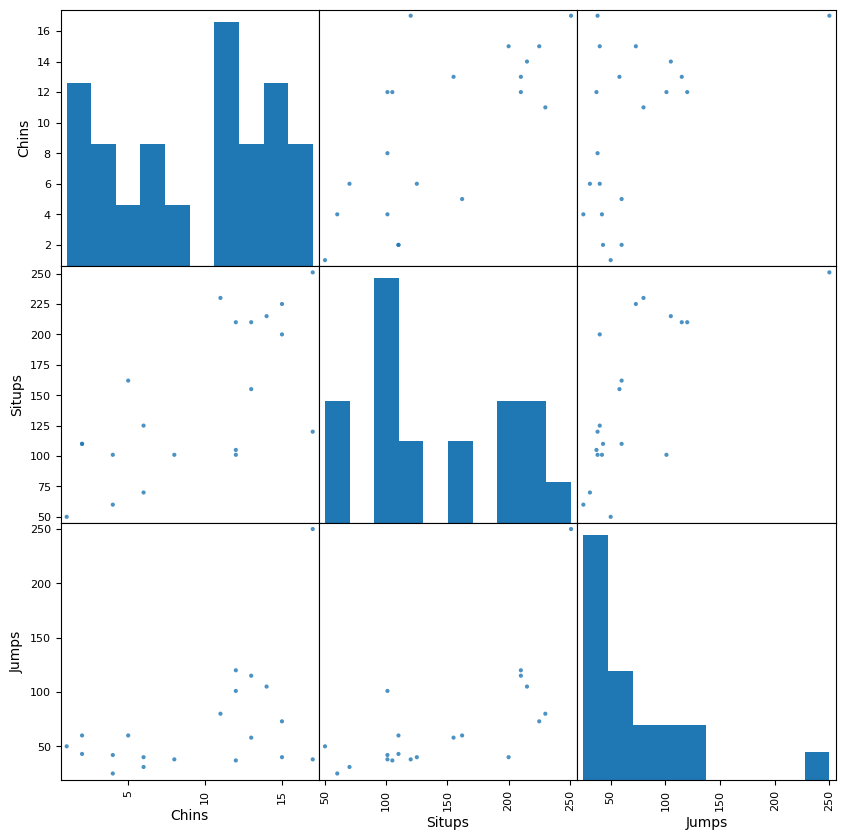

In [59]:
from pandas.plotting import scatter_matrix
import pandas as pd

# Создайте DataFrame из данных датасета
df = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)

# Постройте парные диаграммы рассеяния
scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()

In [60]:
X = linnerud.data
y = linnerud.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

knn_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Наилучший параметр n_neighbors для KNeighborsRegressor:", best_params)

best_knn_regressor = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'])
best_knn_regressor.fit(X_train, y_train)

y_pred = best_knn_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели KNeighborsRegressor с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

Наилучший параметр n_neighbors для KNeighborsRegressor: {'n_neighbors': 7}
Оценка точности модели KNeighborsRegressor с наилучшими параметрами:
Коэффициент детерминации (R^2): -0.5124247965467581


In [62]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели LinearRegression (без настройки параметров):")
print(f"Коэффициент детерминации (R^2): {r2}")

Оценка точности модели LinearRegression (без настройки параметров):
Коэффициент детерминации (R^2): -1.3504115542086355


In [63]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_regressor = Ridge()

grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Наилучший параметр alpha для Ridge:", best_params)

best_ridge_regressor = Ridge(alpha=best_params['alpha'])

best_ridge_regressor.fit(X_train, y_train)

y_pred = best_ridge_regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Оценка точности модели Ridge с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

Наилучший параметр alpha для Ridge: {'alpha': 10}
Оценка точности модели Ridge с наилучшими параметрами:
Коэффициент детерминации (R^2): -1.3160818062747293


In [64]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_regressor = Lasso()

grid_search = GridSearchCV(lasso_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Наилучший параметр alpha для Lasso:", best_params)

best_lasso_regressor = Lasso(alpha=best_params['alpha'])
best_lasso_regressor.fit(X_train, y_train)

y_pred = best_lasso_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("Оценка точности модели Lasso с наилучшими параметрами:")
print(f"Коэффициент детерминации (R^2): {r2}")

Наилучший параметр alpha для Lasso: {'alpha': 10}
Оценка точности модели Lasso с наилучшими параметрами:
Коэффициент детерминации (R^2): -0.6951271148725215
